-----------------------------------------
organic
-----------------------------------------
file name:   star_particles_028_z000p000.hdf5	 redshift:   7.05	 mass:   [736106.64167352]	 mag of velcoity vector:   110.57880039810792	 Kinetic energy:   [4.50043495e+09]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.971	 mass:   [499810.80562982]	 mag of velcoity vector:   57.49097849693746	 Kinetic energy:   [8.25990488e+08]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.487	 mass:   [571699.90597443]	 mag of velcoity vector:   80.51214647792726	 Kinetic energy:   [1.8529382e+09]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.037	 mass:   [536163.93213463]	 mag of velcoity vector:   12.157571563597056	 Kinetic energy:   [39624269.53615312]
file name:   star_particles_028_z000p000.hdf5	 redshift:   4.485	 mass:   [487067.2259946]	 mag of velcoity vector:   58.04980180340071	 Kinetic energy:   [8.20654574e+08]
file name:   star_particles_028_z000p000.

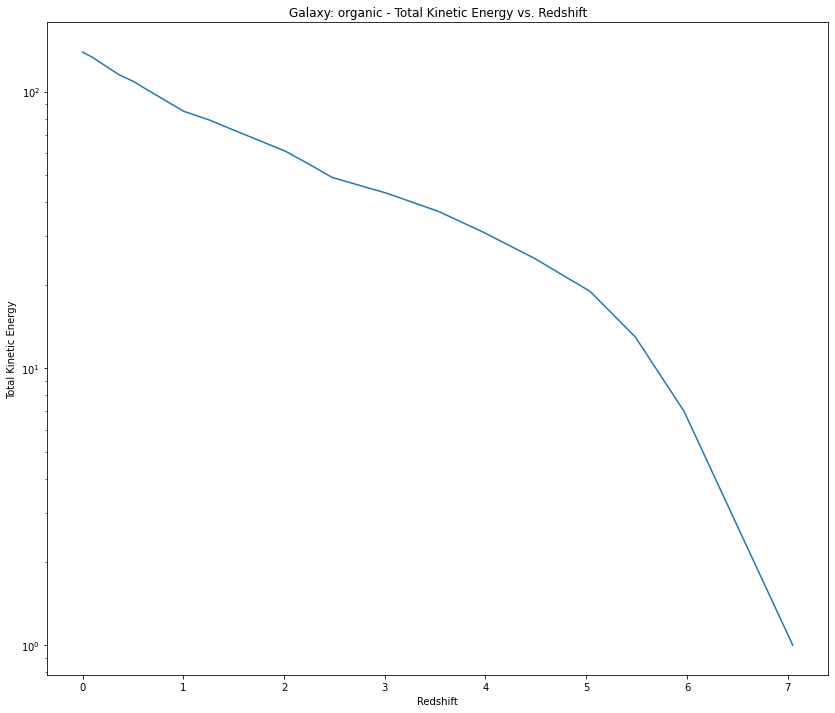

-----------------------------------------
gm_late
-----------------------------------------
file name:   star_particles_028_z000p000.hdf5	 redshift:   7.05	 mass:   [521868.19507795]	 mag of velcoity vector:   50.993904157790936	 Kinetic energy:   [6.78527355e+08]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.971	 mass:   [530602.04822776]	 mag of velcoity vector:   65.19538661955386	 Kinetic energy:   [1.12764567e+09]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.487	 mass:   [506081.84393088]	 mag of velcoity vector:   65.65449598991057	 Kinetic energy:   [1.09073614e+09]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.037	 mass:   [620517.44983406]	 mag of velcoity vector:   29.40454071513567	 Kinetic energy:   [2.68258075e+08]
file name:   star_particles_028_z000p000.hdf5	 redshift:   4.485	 mass:   [515411.01253645]	 mag of velcoity vector:   31.00177413776002	 Kinetic energy:   [2.47683339e+08]
file name:   star_particles_028_z000p000.hd

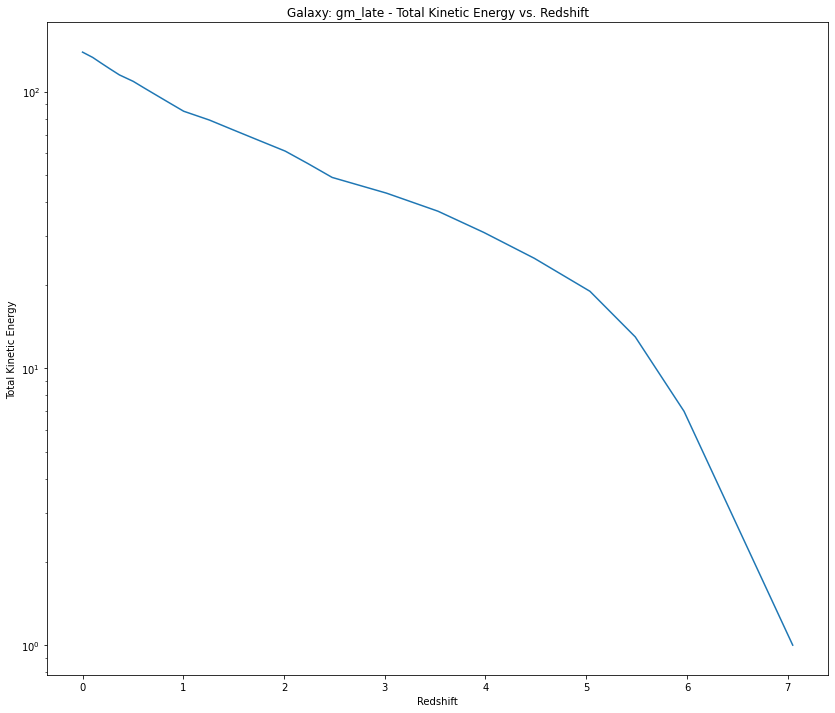

-----------------------------------------
gm_early
-----------------------------------------
file name:   star_particles_028_z000p000.hdf5	 redshift:   7.05	 mass:   [520561.12937572]	 mag of velcoity vector:   23.500832532743104	 Kinetic energy:   [1.43750127e+08]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.971	 mass:   [604101.98307137]	 mag of velcoity vector:   39.61314788194196	 Kinetic energy:   [4.73978864e+08]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.487	 mass:   [511835.98314709]	 mag of velcoity vector:   247.31642975661595	 Kinetic energy:   [1.56533305e+10]
file name:   star_particles_028_z000p000.hdf5	 redshift:   5.037	 mass:   [651919.63708167]	 mag of velcoity vector:   120.09116363738336	 Kinetic energy:   [4.70095586e+09]
file name:   star_particles_028_z000p000.hdf5	 redshift:   4.485	 mass:   [606783.60663505]	 mag of velcoity vector:   114.20492566079402	 Kinetic energy:   [3.95706801e+09]
file name:   star_particles_028_z000p00

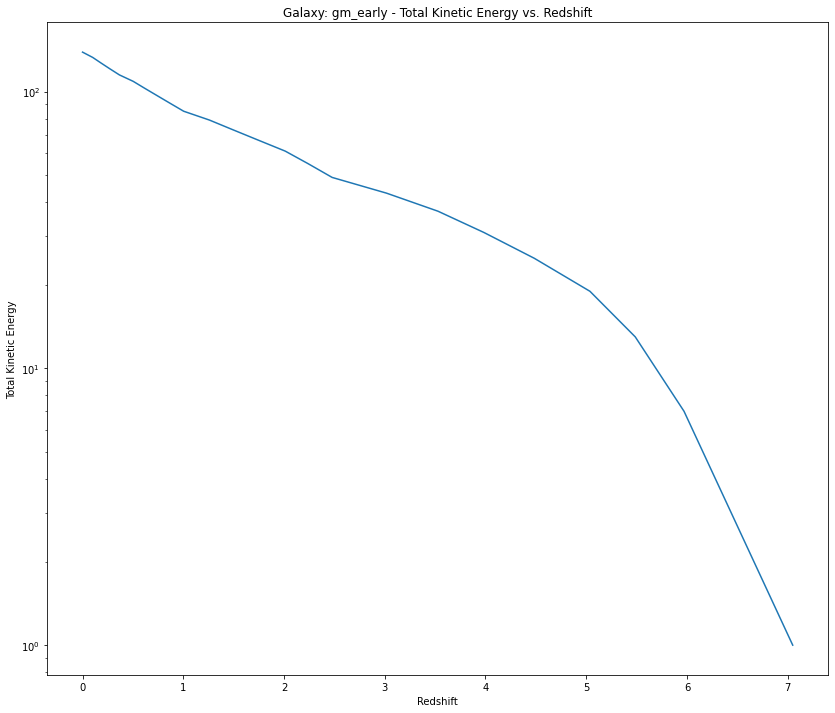

In [9]:
import h5py
import matplotlib.pyplot as plt
import os
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re
import pandas as pd

datasets = ['organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    count = 0

    galaxyAm = np.array(range(144), dtype=object).reshape(24,6)
    galaxyAm2 = np.array(range(144), dtype=object).reshape(24,6)
    galaxyAm3 = np.array(range(144), dtype=object).reshape(24,6)
    galaxyAm4 = np.array(range(144), dtype=object).reshape(24,6)
   
    for file in files:
    #if 1==1:



        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        redshift = float(s)
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        # extract data from the file
        ds_c = f['Coordinates']
        ds_v = f['Velocity']                    
        ds_m = f['Mass']
        
        
        # Calculate the maginitude of the velocity vector
        import numpy as np
        vel = np.array(ds_v[0:1])
        velvec = np.linalg.norm(vel)
        
        # calculate Ekin
        EKin = (0.5)*(ds_m[0:1])*((velvec)**2)

        # Store totals of all particles for each redshift in the current galaxy
        galaxyAm[count, 0] = redshift
        galaxyAm2[count, 0] = ds_m[0:1]
        galaxyAm3[count, 0] = velvec
        galaxyAm4[count, 0] = EKin
              
        count = count + 1
        

    for n in range(24):
            print('file name:   '+ file   +  '\t redshift:   ' + str(galaxyAm[n][0]) + '\t mass:   ' + str(galaxyAm2[n][0]) + '\t mag of velcoity vector:   ' + str(galaxyAm3[n][0]) + '\t Kinetic energy:   ' + str(galaxyAm4[n][0]))

    plt.plot(galaxyAm[0:,0], galaxyAm4[0:,1])
    plt.title('Galaxy: ' + dataset + ' - Total Kinetic Energy vs. Redshift')
    plt.xlabel('Redshift')
    plt.ylabel('Total Kinetic Energy')
    plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    plt.rcParams["figure.figsize"] = (14,12)
    plt.semilogy()
    plt.show()
           
      